## Проверка гипотез о заболеваемости разных групп сотрудников в компании

**Задача:**
В компании N работают мужчины и женщины разного возраста. Иногда они заболевают и пропускают по болезни часть рабочих дней. В файле absent_days_test_data.csv содержится информация о сотруднике (пол, возраст) и о количестве пропущенных ими по болезни рабочих дней. Задача состоит в проверке двух статистических гипотез:
- Мужчины пропускают два или более рабочих дней значимо чаще женщин
- Сотрудники старше 35 лет пропускают два или более рабочих дней значимо чаще более молодых коллег

_Решение должно содержать графики распределений, используемые статистические критерии, результат проверки гипотез._

### Гипотеза №1: Мужчины пропускают 2 и более рабочих дней значимо чаще, чем женщины.

Импортируем необходимые библиотеки и загружаем файл

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns

df = pd.read_csv('/Users/ilyanovikov/Desktop/absent_days_test_data.csv', sep = ';')
print('Первые несколько строчек из загруженного файла:')
df.head(7)

Первые несколько строчек из загруженного файла:


,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М
5,4,38,М
6,1,49,Ж


Выберем тех сотрудников, которые пропустили по болезни два или более дней. Далее из получившихся данных извлечем выборки, соответствующие сотрудникам-мужчинам и женщинам. Несмотря на то, что объект исследования для этих выборок один и тот же, группы испытуемых разные, поэтому выборки нельзя считать связанными/зависимыми.

In [3]:
data1 = df[df['Количество больничных дней'] > 2]
data_male = data1[data1.Пол == 'М']
data_female = data1[data1.Пол == 'Ж']

 Построим гистограммы двух выборок. Посмотрим на их сводную статистику.

Мужчины 
 count    84.000000
mean      4.333333
std       1.475367
min       3.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       8.000000
Name: Количество больничных дней, dtype: float64

 Женщины 
 count    67.000000
mean      4.238806
std       1.268375
min       3.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       8.000000
Name: Количество больничных дней, dtype: float64


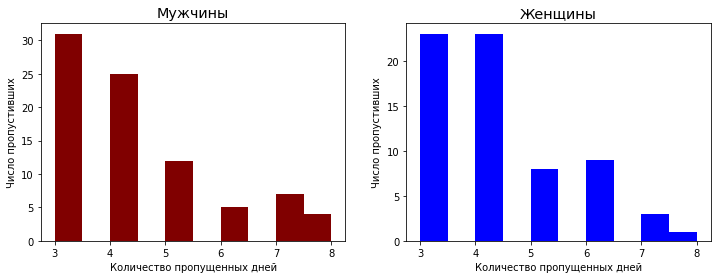

In [4]:
figure, ax = plt.subplots(1, 2, figsize = (12,4))

plt.rcParams.update({'font.size': 12})

ax[0].hist(data_male['Количество больничных дней'], color = 'maroon')
ax[0].set_title('Мужчины')
ax[0].set_xlabel('Количество пропущенных дней')
ax[0].set_ylabel('Число пропустивших')
#ax[0].set_xlim(0,9)

ax[1].hist(data_female['Количество больничных дней'], color = 'blue')
ax[1].set_title('Женщины')
ax[1].set_xlabel('Количество пропущенных дней')
ax[1].set_ylabel('Число пропустивших')

print('Мужчины','\n', data_male['Количество больничных дней'].describe())
print('\n','Женщины','\n', data_female['Количество больничных дней'].describe())


Можно также аппроксимировать выборочные данные ядерной оценкой плотности:

Text(0.5, 1.0, 'KDE-plot')

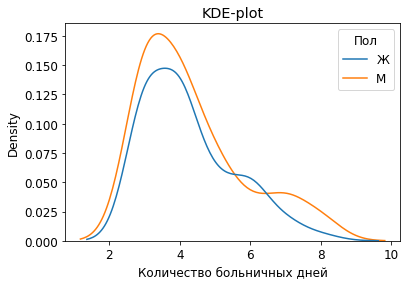

In [5]:
fig = sns.kdeplot(data = data1, x = 'Количество больничных дней', hue = 'Пол')
fig.set_title('KDE-plot')

Первый шаг - проверка гипотезы о том, что выборки извлечены из генеральной совокупности (ГС), в которой случайная величина (СВ) распределена по нормальному закону. Это нужно для выбора статистического критериями в дальнейшем.

#### Процесс проверки статистической гипотезы о нормальности распределения:

1. Формируем нулевую (H0) и альтернативную (H1) гипотезы:
- В ГС, из которой извлечены выборки, случайная величина распределена нормально (H0)
- В ГС распределение случайной величины значимо отличается от нормального (H1)

2. Выбираем p-уровень значимости (порог отклонения нулевой гипотезы при условии, что она верна). Здесь и далее он будет выбран равным 0.05.

3. Выбираем статистический тест. Для проверки распределений на нормальность будем использовать тест Шапиро-Вилка.

4. Если рассчитанная тестом вероятность (pval) получить такие или еще большие отклонения (при условии верности H0) меньше порога значимости (0.05), то отвергаем 0-ю гипотезу и считаем, что распределение отличается от нормального. Если pval > 0.05, то достаточных оснований для отклонения нулевой гипотезы нет, в этом случае считаем, что СВ в ГС (и выборке) распределена нормально.

Гипотезу о нормальности распределения будем проверять для обеих выборок.

In [8]:
male_sick = data_male['Количество больничных дней'].to_numpy()
female_sick = data_female['Количество больничных дней'].to_numpy()

print('мужчины','\n')
statm, pm = sts.shapiro(male_sick)
print('статистика:', statm)
print('p-val:',pm)

if pm > 0.05:
    print('СВ распределена нормально (верна 0-я гипотеза)','\n')
else:
    print('CВ, из которой извлечена выборка, распределена НЕ НОРМАЛЬНО','\n')
    
    
print('женщины','\n')
statf, pf = sts.shapiro(female_sick)
print('статистика:', statf)
print('p-val:',pf)

if pf > 0.05:
    print('СВ распределена нормально (верна 0-я гипотеза)')
else:
    print('CВ, из которой извлечена выборка, распределена НЕ НОРМАЛЬНО')

мужчины 

статистика: 0.8159011602401733
p-val: 7.513522248814297e-09
CВ, из которой извлечена выборка, распределена НЕ НОРМАЛЬНО 

женщины 

статистика: 0.8414593935012817
p-val: 5.730509542445361e-07
CВ, из которой извлечена выборка, распределена НЕ НОРМАЛЬНО


#### Промежуточный итог:
Итак, у нас есть две независимые (несвязанные) выборки, извлеченные из ГС, СВ в которой не подчиняется нормальному закону. Для установления наличия (или отсутствия) статистически значимых различий в этом случае необходимо использовать непараметрические критерии. В рассматриваемом случае (2 выборки, независимые, распределение отличаеся от нормального) следует использовать ***U-критерий Манна-Уитни***.

#### Проверка гипотезы о статистической значимости значимости различий в двух рассматриваемых группах

1. Формируем нулевую (H0) и альтернативную (H1) гипотезы:
- Отсутствуют статистически значимые различия в частоте пропусков у мужчин и женщин (H0)
- Есть статистически значимые различия в частоте пропусков двух рассматриваемых групп (H1)

2. Выбираем p-уровень значимости равным 0.05.

3. В качестве статистического теста будем использовать U-критерий Манна-Уитни.


4. Устанавливаем следующие правила:
- Если pval < 0.05: Различия статистически значимы;
- Если pval > 0.05: Нет достаточных оснований для того, чтобы отвергнуть нулевую гипотезу. Нельзя говорить о значимости различий.

**UPD** Можно использовать не двусторонний критерий Манна-Уитни, а односторонний и проверять более конкретные гипотезы (одно больше или меньше другого). Это лучше подходит для нашей задачи.

Для одностороннего критерия модифицируем альтернативную гипотезу:

H1: Мужчины пропускают значимо чаще (больше), чем женщины.


In [10]:
stats_mf, p_mf = sts.mannwhitneyu(male_sick,female_sick, alternative = 'greater')
print('U-критерий Манна-Уитни')
print('Статистика:', stats_mf)
print('p-value:',p_mf)

if p_mf < 0.05:
    print('Мужчины пропускают по болезни чаще, чем женщины.')
else:
    print('Различия между двумя группами НЕ являются статистически значимыми')

U-критерий Манна-Уитни
Статистика: 2829.0
p-value: 0.4774086565269439
Различия между двумя группами НЕ являются статистически значимыми


Мы видим, что вероятность получить такие или еще большие различия при условии, что верна нулевая гипотеза, оказалась заметно выше уставноленного порога.

**ИТОГ**: Различия в частоте более 2 пропусков мужчинами и женщинами **НЕ являются значимыми**.

-----------------

### Гипотеза №2:	Работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег.

Стандартная процедура: фильтрация данных, извлечение выборок, построение гистограмм распределений, описательная статистика.

Старшие товарищи 
 count    115.000000
mean       4.243478
std        1.361058
min        3.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        8.000000
Name: Количество больничных дней, dtype: float64

 Молодые сотрудники 
 count    36.000000
mean      4.444444
std       1.462765
min       3.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       8.000000
Name: Количество больничных дней, dtype: float64


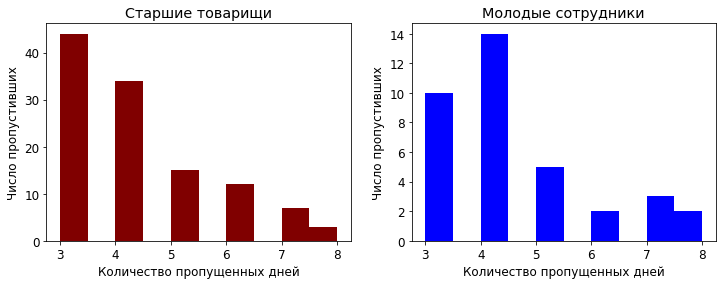

In [11]:
data1 = df[df['Количество больничных дней'] > 2]

over_th = data1[data1['Возраст']> 35] #старше 35
under_th = data1[data1['Возраст'] <= 35] #моложе 35

figure, ax = plt.subplots(1, 2, figsize = (12,4))

plt.rcParams.update({'font.size': 12})

ax[0].hist(over_th['Количество больничных дней'], color = 'maroon')
ax[0].set_title('Старшие товарищи')
ax[0].set_xlabel('Количество пропущенных дней')
ax[0].set_ylabel('Число пропустивших')

ax[1].hist(under_th['Количество больничных дней'], color = 'blue')
ax[1].set_title('Молодые сотрудники')
ax[1].set_xlabel('Количество пропущенных дней')
ax[1].set_ylabel('Число пропустивших')

print('Старшие товарищи','\n', over_th['Количество больничных дней'].describe())
print('\n','Молодые сотрудники','\n', under_th['Количество больничных дней'].describe())



Text(0.5, 1.0, 'KDE-plot')

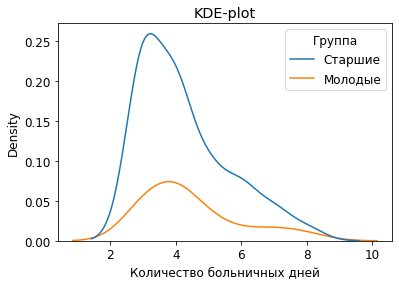

In [12]:
data2 = data1.reset_index().drop('index', axis = 1)

data2['Группа'] = None
for i in range(0, len(data2)):
    if data2.loc[i,'Возраст'] > 35:
        data2.loc[i,'Группа'] = 'Старшие'
    else:
        data2.loc[i,'Группа'] = 'Молодые'

fig = sns.kdeplot(data = data2, x ='Количество больничных дней', hue = 'Группа')
fig.set_title('KDE-plot')

#### Проверка распределения выборочных данных на нормальность.

Кратко процедура проверки:
1. Формируем H0 и H1:
- Распределение СВ в выборке нормальное;
- Распределение СВ в выборке отличается от нормального;

2. Выбираем p-уровень значимости: p<sub>crit</sub> = 0.05

3. Выбираем статистический критерий: тест Шапиро-Вилка


4. Правила:
- p-val < p<sub>crit</sub>: Распределение отличается от нормального
- p-val > p<sub>crit</sub>: Нет оснований утверждать, что распределения выборочных данных отличается от нормального

In [13]:
# Проверка обоих распределений на нормальность

over_th_sick = over_th['Количество больничных дней'].to_numpy()
under_th_sick = under_th['Количество больничных дней'].to_numpy()

print('Старшие товарищи','\n')
stato, po = sts.shapiro(over_th_sick)
print('статистика:', stato)
print('p-val:',po)

if po < 0.05:
    print('CВ, из которой извлечена выборка, распределена НЕ НОРМАЛЬНО','\n')
else:
    print('СВ распределена нормально (верна 0-я гипотеза)','\n')

print('Молодые сотрудники','\n')
statu, pu = sts.shapiro(under_th_sick)
print('статистика:', statu)
print('p-val:',pu)

if pu < 0.05:
    print('CВ, из которой извлечена выборка, распределена НЕ НОРМАЛЬНО','\n')
else:
    print('СВ распределена нормально (верна 0-я гипотеза)','\n')



Старшие товарищи 

статистика: 0.8259267210960388
p-val: 2.490216088890662e-10
CВ, из которой извлечена выборка, распределена НЕ НОРМАЛЬНО 

Молодые сотрудники 

статистика: 0.8257861733436584
p-val: 5.530375710804947e-05
CВ, из которой извлечена выборка, распределена НЕ НОРМАЛЬНО 



В обеих наших независимых выборках случайная величина распределена не по нормальному закону. Необходимо использовать **U-критерий Манна-Уитни**.

#### Проверка гипотезы о значимости различий в частоте пропусков у взрослых и молодых сотрудников.

1. Нулевая и альтернативная гипотезы:
- Отсутствуют статистически значимые различия в частоте пропусков у взрослых и молодых сотрудников (H0)
- Есть статистически значимые различия в частоте пропусков двух рассматриваемых групп (H1)

2. Выбираем p-уровень значимости равным 0.05.

3. В качестве статистического теста будем использовать U-критерий Манна-Уитни.


4. Устанавливаем следующие правила:
- Если pval < 0.05: Различия статистически значимы;
- Если pval > 0.05: Нет достаточных оснований для того, чтобы отвергнуть нулевую гипотезу. Нельзя говорить о значимости различий.

In [14]:
stats_ou, p_ou = sts.mannwhitneyu(over_th_sick, under_th_sick)
print('U-критерий Манна-Уитни')
print('Статистика:', stats_ou)
print('p-value:',p_ou)

if p_mf < 0.05:
    print('Различия между двумя группами статистически значимые')
else:
    print('Различия между двумя группами НЕ являются статистически значимыми')

U-критерий Манна-Уитни
Статистика: 1888.0
p-value: 0.408297183958816
Различия между двумя группами НЕ являются статистически значимыми


**Итог**: Видно, что p-value оказался больше критического значения. Различия в частоте пропусков между более взрослыми и молодыми сотрудниками оказались **незначимыми**.

### Вывод 
По результатам проверки обеих гипотез оказалось, что в обоих случаях наблюдаемые различия **НЕ** являются статистически значимыми. Обе гипотезы были опровергнуты.